<a href="https://colab.research.google.com/github/ChaimaAraibi/Analyse-Videos/blob/main/Analyse_Video_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

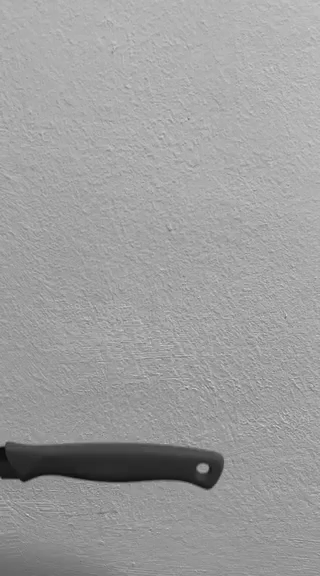

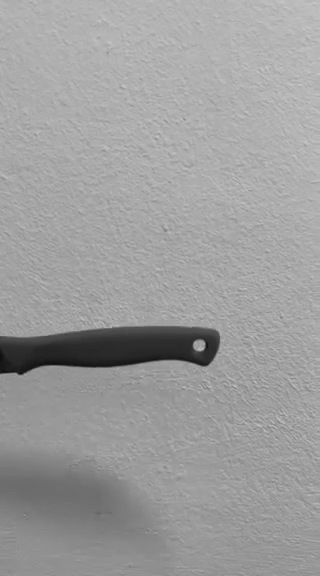

In [ ]:

# function to read the images by taking there path
def read_image(path1,path2):
# reading the images from their using imread() function
	read_img1 = cv2.imread(path1)
	read_img2 = cv2.imread(path2)
	return (read_img1,read_img2)

# function to convert images from RGB to gray scale
def convert_to_grayscale(pic1,pic2):
	gray_img1 = cv2.cvtColor(pic1,cv2.COLOR_BGR2GRAY)
	gray_img2 = cv2.cvtColor(pic2,cv2.COLOR_BGR2GRAY)
	return (gray_img1,gray_img2)

# main function
if __name__ == '__main__':
# giving the path of both of the images
	first_image_path = 'frame1.png'
	second_image_path = 'frame2.png'

	# reading the image from there path by calling the function
	img1, img2 = read_image(first_image_path,second_image_path)

	# converting the read images into the gray scale images by calling the function
	gray_pic1, gray_pic2 = convert_to_grayscale(img1,img2)
	cv2_imshow(gray_pic1)
	cv2_imshow(gray_pic2)
	cv2.waitKey()
	cv2.destroyAllWindows()


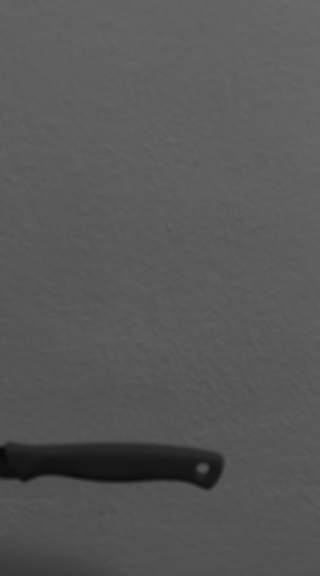

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('frame2.png')
kernel = np.ones((5,5),np.float32)/35
dst = cv2.filter2D(img,-1,kernel)
plt.imshow(dst)


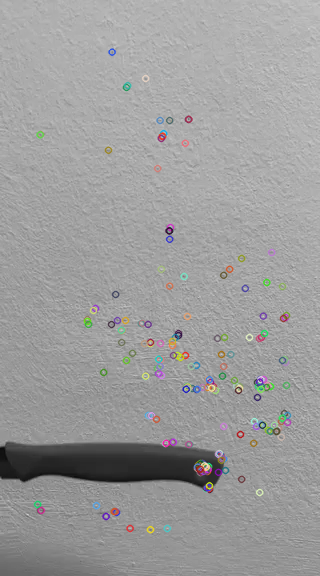

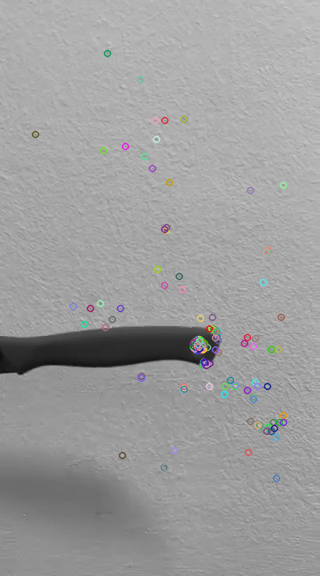

Descriptors of Image 1 [[  9   6   5 ... 141  12  81]
 [  4 239  26 ... 191 169 137]
 [105  21 100 ... 232 208  52]
 ...
 [ 10  15  42 ...  78 189 223]
 [ 11 221  98 ... 150 185 221]
 [ 35 221  98 ...  30 248 142]]
Descriptors of Image 2 [[198  65 175 ... 255  53 119]
 [ 92  94  16 ...  95  13  31]
 [237 194 206 ... 140  88 116]
 ...
 [ 34 201  51 ...  31 117 207]
 [  3 149  98 ...   6 189 223]
 [ 34 201  16 ...  30 255 143]]
------------------------------
Shape of descriptor of first image (226, 32)
Shape of descriptor of second image (157, 32)


In [ ]:
# importing openCV library
import cv2

# function to read the images by taking there path
def read_image(path1,path2):
	read_img1 = cv2.imread(path1)
	read_img2 = cv2.imread(path2)
	return (read_img1,read_img2)

# function to convert images from RGB to gray scale
def convert_to_grayscale(pic1,pic2):
	gray_img1 = cv2.cvtColor(pic1,cv2.COLOR_BGR2GRAY)
	gray_img2 = cv2.cvtColor(pic2,cv2.COLOR_BGR2GRAY)
	return (gray_img1,gray_img2)

# function to detect the features by finding key points and descriptors from the image
def detector(image1,image2):
	# creating ORB detector
	detect = cv2.ORB_create()

	# finding key points and descriptors of both images using detectAndCompute() function
	key_point1,descrip1 = detect.detectAndCompute(image1,None)
	key_point2,descrip2 = detect.detectAndCompute(image2,None)
	return (key_point1,descrip1,key_point2,descrip2)

# main function
if __name__ == '__main__':
# giving the path of both of the images
	first_image_path = 'frame1smooth.png'
	second_image_path = 'frame2smooth.png'

	# reading the image from there paths
	img1, img2 = read_image(first_image_path,second_image_path)

	# converting the read images into the gray scale images
	gray_pic1, gray_pic2 = convert_to_grayscale(img1,img2)

	# storing the finded key points and descriptors of both of the images
	key_pt1,descrip1,key_pt2,descrip2 = detector(gray_pic1,gray_pic2)

	# showing the images with their key points finded by the detector
	cv2_imshow(cv2.drawKeypoints(gray_pic1,key_pt1,None))
	cv2_imshow(cv2.drawKeypoints(gray_pic2,key_pt2,None))

	# printing descriptors of both of the images
	print(f'Descriptors of Image 1 {descrip1}')
	print(f'Descriptors of Image 2 {descrip2}')
	print('------------------------------')

	# printing the Shape of the descriptors
	print(f'Shape of descriptor of first image {descrip1.shape}')
	print(f'Shape of descriptor of second image {descrip2.shape}')

	cv2.waitKey()
	cv2.destroyAllWindows()
